## Desafio 

In [297]:
# Importando arquivo csv e armazenando em variavel
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/Vitor/Documents/trabalho/PB-JOAO-VITOR-DE-MELO-REVOREDO/Sprint-3/Desafio/googleplaystore.csv')

### Removendo linhas duplicadas

In [299]:
# Removendo duplicados e pegando o nome das colunas
df = df.drop_duplicates()
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Tabela com os Top 5 apps mais instalados

In [301]:
# Fazendo o tratamento da coluna Installs para pegar os dados corretos
top_5_apps = df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').replace('Free', 0).astype(float)
top_5_apps = df.nlargest(5, 'Installs')
top_5_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1.000000e+09,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


### Graficos de barras dos Top 5 apps instalados

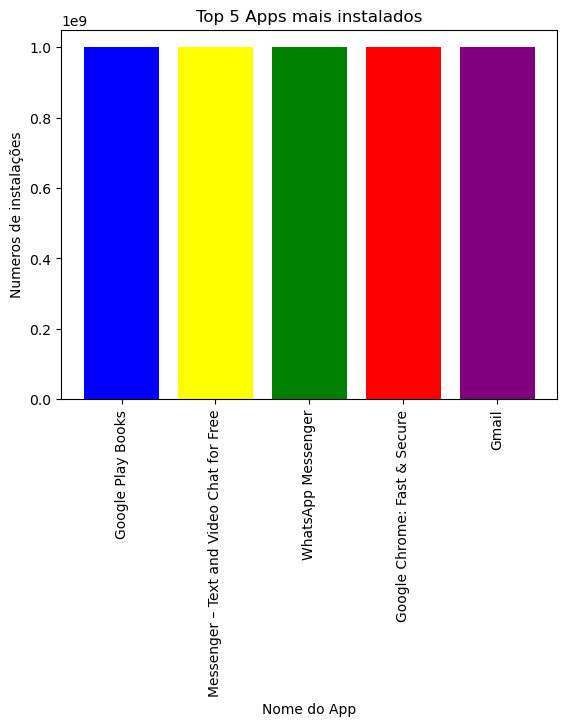

In [163]:
# Colocando cores diferentes em cada app
cores = ['blue', 'yellow', 'green', 'red', 'purple']
# Montando o grafico de barras
plt.bar(top_5_apps['App'], top_5_apps['Installs'], color = cores)
plt.xlabel('Nome do App')
plt.ylabel('Numeros de instalações')
plt.title('Top 5 Apps mais instalados')
plt.xticks(rotation = 90, ha='center')
plt.show()

### Categorias presentes no Dataset

In [66]:
# Separando as Categorias de apps com um limite para ficar mais fácil de vizualizar no grafico
limite = 250
ct = df.groupby('Category')['Installs'].count().sort_values(ascending=False)
categorias_acima_limite = ct[ct >= limite]
categorias_abaixo_limite = ct[ct < limite]
categorias_acima_limite.loc['Outros'] = categorias_abaixo_limite.sum()

### Grafico de pizza das 15 principais Categorias + Outros

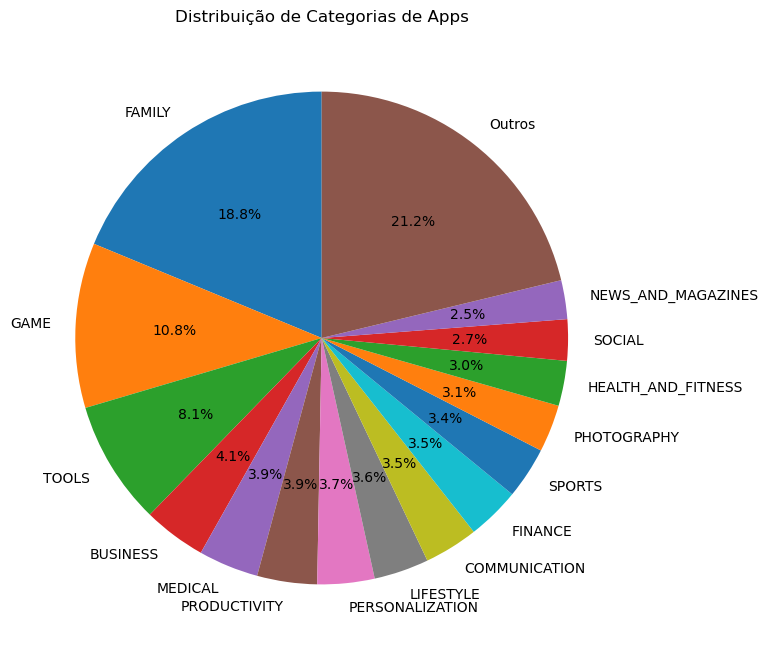

In [68]:
plt.figure(figsize=(8, 8))
plt.pie(categorias_acima_limite, labels=categorias_acima_limite.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Categorias de Apps')
plt.show()

### App mais caro existente no Dataset

In [189]:
# Fazendo o tratamento dos dados da coluna Price
precos_float = df['Price'].str.replace('$', '').replace('Everyone', '0').astype(float)
# Pegando o primeiro indice gerado
app_mais_caro = df.loc[precos_float.nlargest(1).index]
app_mais_caro[['App', 'Price']]

,App,Price
4367,I'm Rich - Trump Edition,$400.00


### Contando quantos apps têm a classificação "Mature 17+"

In [310]:
# 
classificacao = (df['Content Rating'] == 'Mature 17+').sum()
print("Total de apps encontrados com a Classificação Mature +17: ")
classificacao

Total de apps encontrados com a Classificação Mature +17: 


447

### Top 10 apps por número de reviews

In [213]:
# Selecionando do df a lista dos apps e ordenando os valores
top_10_apps = df[['App', 'Reviews']].sort_values('Reviews', ascending= False)
top_10_apps.head(10)

,App,Reviews
2989,GollerCepte Live Score,9992
4970,Ad Block REMOVER - NEED ROOT,999
2705,SnipSnap Coupon App,9975
3229,DreamTrips,9971
3049,US Open Tennis Championships 2018,9971
7002,Adult Color by Number Book - Paint Mandala Pages,997
6724,BSPlayer ARMv7 VFP CPU support,9966
7982,"Easy Resume Builder, Resume help, Curriculum v...",996
353,MegaFon Dashboard,99559
326,Buff Thun - Daily Free Webtoon / Comics / Web ...,9952


### Exemplos de calculos possiveis com o Dataset

In [262]:
# Média de Preço dos Apps por Categoria 
preco_tratado = df['Price'].str.replace('$', '').str.replace('Everyone', '0').str.replace(',', '')
preco_tratado = pd.to_numeric(preco_tratado, errors='coerce')
df['Price_float'] = preco_tratado
media_preco_por_categoria = df.groupby('Category')['Price_float'].mean().sort_index()
media_preco_por_categoria

Category
1.9                    0.000000
ART_AND_DESIGN         0.091846
AUTO_AND_VEHICLES      0.158471
BEAUTY                 0.000000
BOOKS_AND_REFERENCE    0.520739
BUSINESS               0.410515
COMICS                 0.000000
COMMUNICATION          0.227158
DATING                 0.160357
EDUCATION              0.138154
ENTERTAINMENT          0.071892
EVENTS                 1.718594
FAMILY                 1.245919
FINANCE                8.057861
FOOD_AND_DRINK         0.068387
GAME                   0.256289
HEALTH_AND_FITNESS     0.210294
HOUSE_AND_HOME         0.000000
LIBRARIES_AND_DEMO     0.011647
LIFESTYLE              6.329410
MAPS_AND_NAVIGATION    0.196715
MEDICAL                2.501691
NEWS_AND_MAGAZINES     0.015076
PARENTING              0.159667
PERSONALIZATION        0.390387
PHOTOGRAPHY            0.379596
PRODUCTIVITY           0.616536
SHOPPING               0.024464
SOCIAL                 0.057036
SPORTS                 0.284900
TOOLS                  0.317023

In [229]:
# Numero total de apps por categoria
total_apps_por_categoria = df['Category'].value_counts()
print("Número Total de Apps por Categoria:")
print(total_apps_por_categoria)

Número Total de Apps por Categoria:
Category
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Nam

In [260]:
# Media de preço dos apps
preco_tratado = df['Price'].str.replace('$', '').replace('Everyone', '0').astype(float)
media_preco = preco_tratado.mean()
print("\nMédia de Preço dos Apps:")
print(media_preco)


Média de Preço dos Apps:
1.0307009075111024


In [312]:
# App pago mais barato do Dataset
# Fazendo o tratamento da coluna Price e separando os que são gratuitos (=0)
precos_float = df['Price'].str.replace('$', '').replace('Everyone', '0').str.replace(',', '')
precos_float = pd.to_numeric(precos_float, errors='coerce')
precos_float = precos_float[precos_float > 0]
# Condição para exibir informações do App
if not precos_float.empty:
    app_mais_barato = df.loc[precos_float.nsmallest(1).index]
    print("App mais barato presente no Dataset:")
    print(app_mais_barato[['App', 'Price']])
    preco_mais_barato = precos_float.nsmallest(1).values[0]
    print(f"Preço do App pago mais barato: ${preco_mais_barato:.2f}")
# Condição caso os dados do Dataset não tivessem apps pagos
else:
    print("Não há aplicativos com preço diferente de zero.")


App mais barato presente no Dataset:
                       App  Price
2171  All-in-One Mahjong 3  $0.99
Preço do App pago mais barato: $0.99


## - Gráficos com os dados do DataFrame

## Gráfico de dispersão

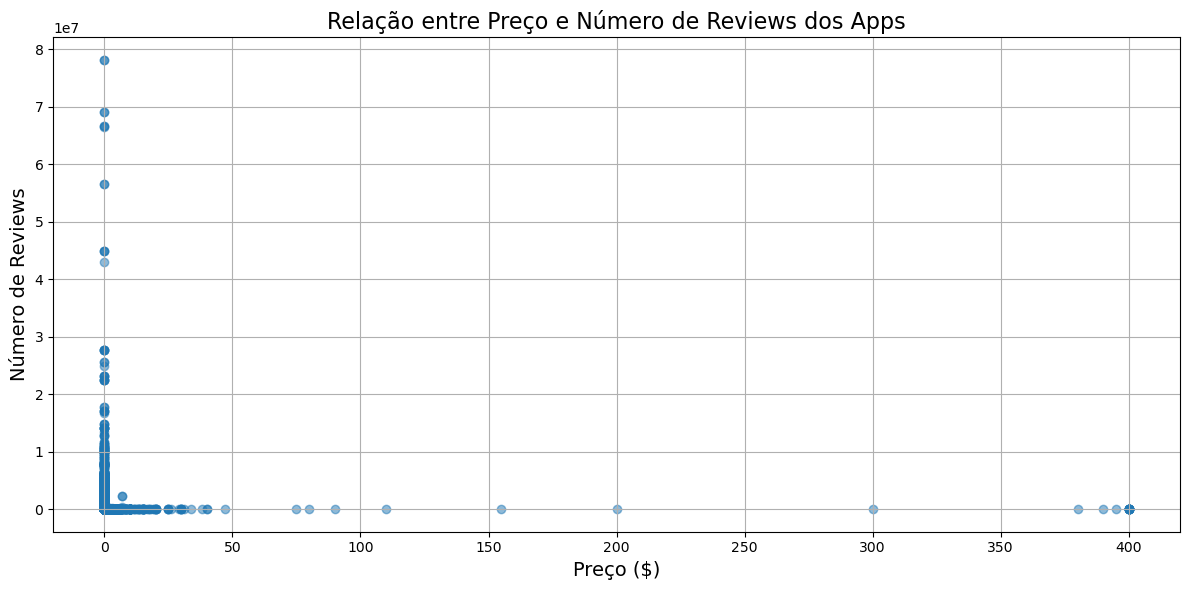

In [233]:
# Preço por número de reviews
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
plt.figure(figsize=(12, 6))
plt.scatter(df['Price'].str.replace('$', '').replace('Everyone', '0').astype(float), df['Reviews'], alpha=0.5)
plt.title('Relação entre Preço e Número de Reviews dos Apps', fontsize=16)
plt.xlabel('Preço ($)', fontsize=14)
plt.ylabel('Número de Reviews', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

## Gráfico de linhas

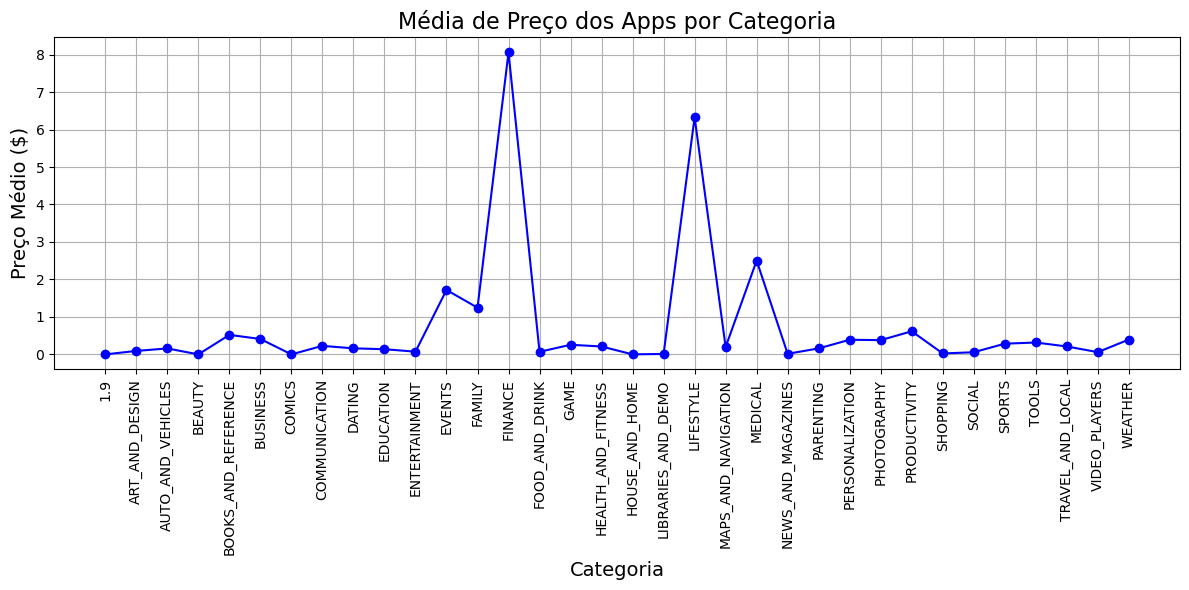

In [252]:
# Média de Preço dos Apps por Categoria 
# Fazendo tratamento dos dados da Coluna Price para utilizar novamente
preco_tratado = df['Price'].str.replace('$', '').str.replace('Everyone', '0').str.replace(',', '')
preco_tratado = pd.to_numeric(preco_tratado, errors='coerce')
df['Price_float'] = preco_tratado
# Calculando a média de preço por categoria
media_preco_por_categoria = df.groupby('Category')['Price_float'].mean().sort_index()

# Gráfico de Linhas
plt.figure(figsize=(12, 6))
plt.plot(media_preco_por_categoria.index, media_preco_por_categoria, marker='o', linestyle='-', color='blue')
plt.title('Média de Preço dos Apps por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Preço Médio ($)', fontsize=14)
plt.xticks(rotation=90, ha= 'center')
plt.grid()
plt.tight_layout()
plt.show()
